# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

C:\Users\isaac\AppData\Local\Temp\ipykernel_8852\760489034.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


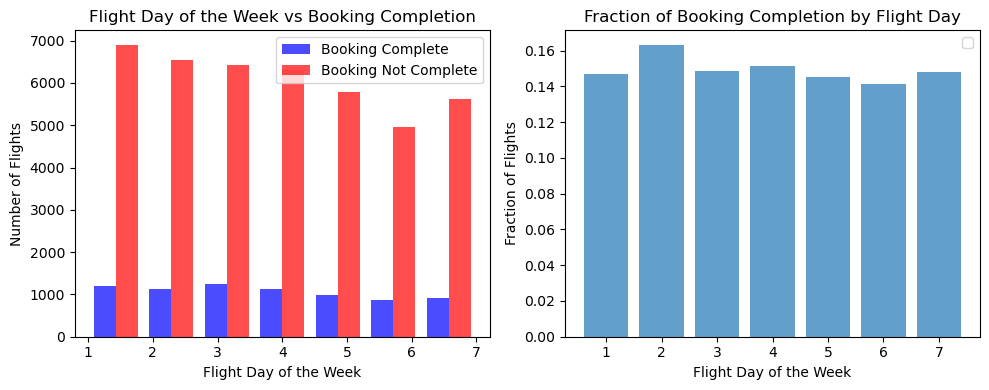

In [9]:
import matplotlib.pyplot as plt

fig, ((ax0, ax1)) = plt.subplots(1, 2, figsize=(10, 4))
ax0.hist([df[df['booking_complete'] == 1]["flight_day"], df[df['booking_complete'] == 0]["flight_day"]], bins=7, rwidth=0.8, label=["Booking Complete", "Booking Not Complete"], color=["blue", "red"], alpha=0.7)
ax0.set_xlabel("Flight Day of the Week")
ax0.set_ylabel("Number of Flights")
ax0.legend()
ax0.set_title("Flight Day of the Week vs Booking Completion")

total_flights = df[df['booking_complete'] == 1]['flight_day'].value_counts() + df[df['booking_complete'] == 0]['flight_day'].value_counts()

ax1.bar(df[df['booking_complete'] == 1]["flight_day"].value_counts().index, df[df['booking_complete'] == 1]["flight_day"].value_counts()/total_flights, alpha=0.7)
ax1.set_xlabel("Flight Day of the Week")
ax1.set_ylabel("Fraction of Flights")
ax1.legend()
ax1.set_title("Fraction of Booking Completion by Flight Day")
fig.tight_layout()

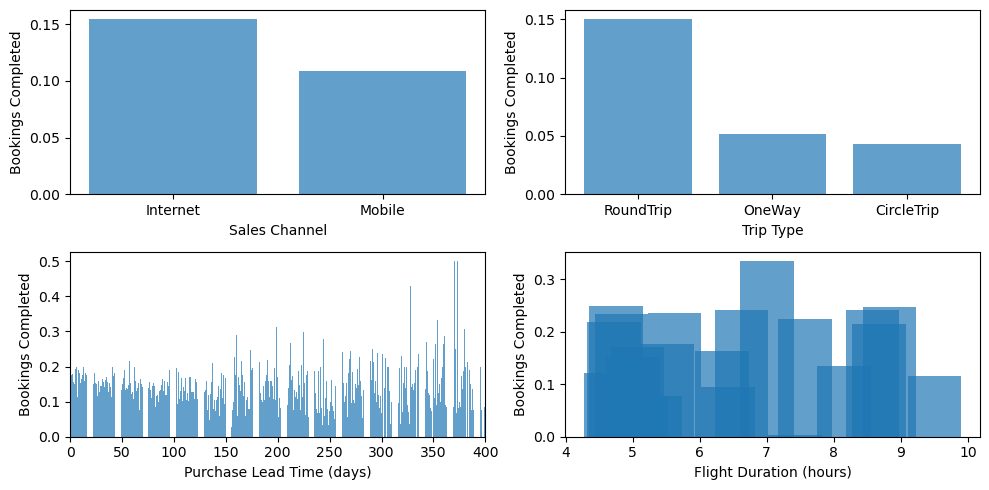

In [10]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(10, 5))

total_flights = df[df['booking_complete'] == 1]['sales_channel'].value_counts() + df[df['booking_complete'] == 0]['sales_channel'].value_counts()

ax0.bar(df[df['booking_complete'] == 1]["sales_channel"].value_counts().index, df[df['booking_complete'] == 1]["sales_channel"].value_counts()/total_flights, alpha=0.7)
ax0.set_xlabel("Sales Channel")
ax0.set_ylabel("Bookings Completed")
total_flights = df[df['booking_complete'] == 1]['trip_type'].value_counts() + df[df['booking_complete'] == 0]['trip_type'].value_counts()

ax1.bar(df[df['booking_complete'] == 1]["trip_type"].value_counts().index, df[df['booking_complete'] == 1]["trip_type"].value_counts()/total_flights, alpha=0.7)
ax1.set_xlabel("Trip Type")
ax1.set_ylabel("Bookings Completed")
total_flights = df[df['booking_complete'] == 1]['purchase_lead'].value_counts() + df[df['booking_complete'] == 0]['purchase_lead'].value_counts()

ax2.bar(df[df['booking_complete'] == 1]["purchase_lead"].value_counts().index, df[df['booking_complete'] == 1]["purchase_lead"].value_counts()/total_flights.dropna(), alpha=0.7)
ax2.set_xlim(0, 400)
ax2.set_xlabel("Purchase Lead Time (days)")
ax2.set_ylabel("Bookings Completed")

total_flights = df[df['booking_complete'] == 1]['flight_duration'].value_counts() + df[df['booking_complete'] == 0]['flight_duration'].value_counts()
ax3.bar(df[df['booking_complete'] == 1]["flight_duration"].value_counts().index, df[df['booking_complete'] == 1]["flight_duration"].value_counts()/total_flights.dropna(), alpha=0.7)
ax3.set_xlabel("Flight Duration (hours)")
ax3.set_ylabel("Bookings Completed")
fig.tight_layout()

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.utils import resample, compute_class_weight


In [53]:
X = df.drop(columns=["booking_complete", "trip_type"]) #"wants_preferred_seat", "wants_extra_baggage", "wants_in_flight_meals", "sales_channel"]
y = df["booking_complete"]

label_encoder = LabelEncoder()

for column in X.select_dtypes(include=['object']).columns:
	X[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=137, max_depth=11, max_features='log2', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_features='log2', n_estimators=137,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.83      0.01      0.03      1480

    accuracy                           0.85     10000
   macro avg       0.84      0.51      0.47     10000
weighted avg       0.85      0.85      0.79     10000



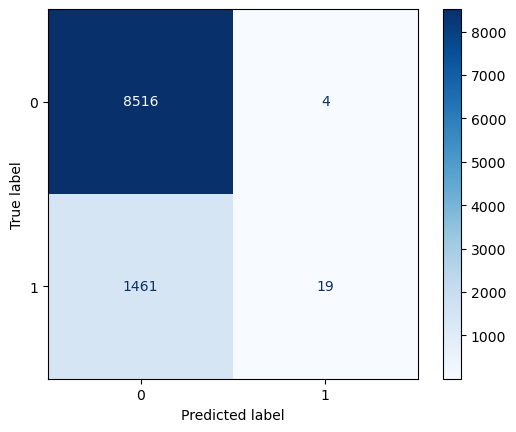

In [54]:
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(report)

ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', values_format='d')

Notice how our model is very biased towards predicting no booking completion, or 0 in this case. This is likely due to an over representation of the label 0 in our training set. Let's investigate the relative numbers of these labels in our original data set with the compute_class_weights function.

In [14]:
class_weights = compute_class_weight(class_weight='balanced', classes=y.unique(), y=y)
print(f'0: {class_weights[0]}, 1: {class_weights[1]}')

0: 0.587930953388834, 1: 3.3431398769724527


As expected, bookings outnumber cancellations around 6:1, so we need to resample the data to balance the classes. We will use the `RandonUnderSampler` from `imblearn` to achieve this.

In [15]:
from imblearn.under_sampling import RandomUnderSampler 
undersampler = RandomUnderSampler(random_state=42)
resampled_X, resampled_y = undersampler.fit_resample(X, y)

class_weights = compute_class_weight(class_weight='balanced', classes=resampled_y.unique(), y=resampled_y)
print(f'0: {class_weights[0]}, 1: {class_weights[1]}')

0: 1.0, 1: 1.0


In [58]:
from imblearn.under_sampling import NearMiss
near = NearMiss(sampling_strategy="majority", version=2, n_neighbors=4, n_jobs=-1)
resampled_X, resampled_y = near.fit_resample(X, y)

In [ ]:
# import the ClusterCentroids object.
from imblearn.under_sampling import ClusterCentroids

# instantiate the object with the right ratio.
cluster_centroids = ClusterCentroids(sampling_strategy="auto")

# fit the object to the training data.
resampled_X, resampled_y = cluster_centroids.fit_sample(X, y)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.98      0.87      0.93      0.93      0.87      1522
          1       0.98      0.87      0.98      0.92      0.93      0.85      1470

avg / total       0.93      0.93      0.93      0.93      0.93      0.86      2992



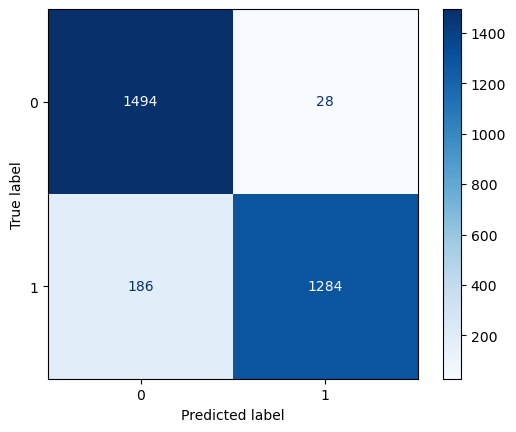

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=137, max_depth=11, max_features='log2', random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(report)

ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', values_format='d')

In [63]:
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
}
random_search = RandomizedSearchCV(estimator=brf, param_distributions=param_dist, cv=5, n_iter=5, random_state=42)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

print(f"Best Parameters: {random_search.best_params_}")

c:\Users\isaac\miniconda3\envs\data-science\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\isaac\miniconda3\envs\data-science\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\isaac\miniconda3\envs\data-science\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\isaac\miniconda3\envs\data-sc

Best Parameters: {'max_depth': 11, 'max_features': 'log2', 'n_estimators': 137}


              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1522
           1       0.98      0.87      0.92      1470

    accuracy                           0.93      2992
   macro avg       0.93      0.93      0.93      2992
weighted avg       0.93      0.93      0.93      2992



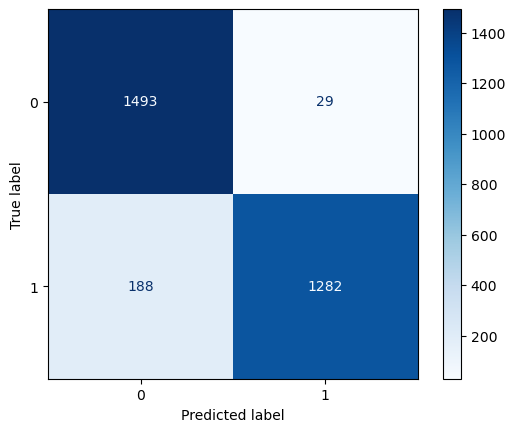

In [70]:
X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=137, max_depth=11, max_features='log2', random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(report)

ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', values_format='d')

In [ ]:
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
}
random_search = RandomizedSearchCV(estimator=brf, param_distributions=param_dist, cv=5, n_iter=5, random_state=42)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

print(f"Best Parameters: {random_search.best_params_}")

c:\Users\isaac\miniconda3\envs\data-science\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\isaac\miniconda3\envs\data-science\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\isaac\miniconda3\envs\data-science\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\isaac\miniconda3\envs\data-sc

Best Parameters: {'max_depth': 11, 'max_features': 'log2', 'n_estimators': 137}


              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1522
           1       0.71      0.62      0.66      1470

    accuracy                           0.69      2992
   macro avg       0.69      0.69      0.69      2992
weighted avg       0.69      0.69      0.69      2992



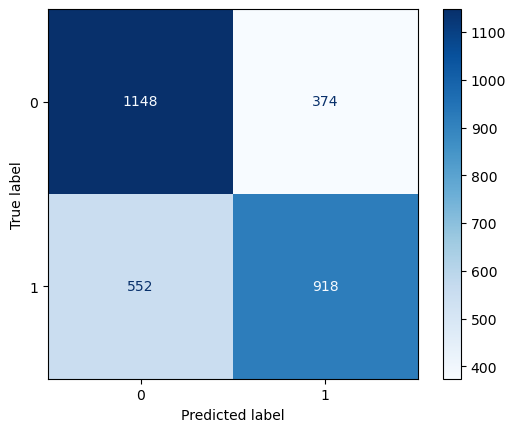

In [19]:
y_pred = best_rf.predict(X_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(report)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', values_format='d')

purchase_lead            0.175591
length_of_stay           0.349457
booking_origin           0.504977
route                    0.653193
flight_duration          0.743079
flight_hour              0.827170
flight_day               0.878503
num_passengers           0.910650
wants_extra_baggage      0.940025
sales_channel            0.960378
wants_preferred_seat     0.980531
wants_in_flight_meals    1.000000
dtype: float64


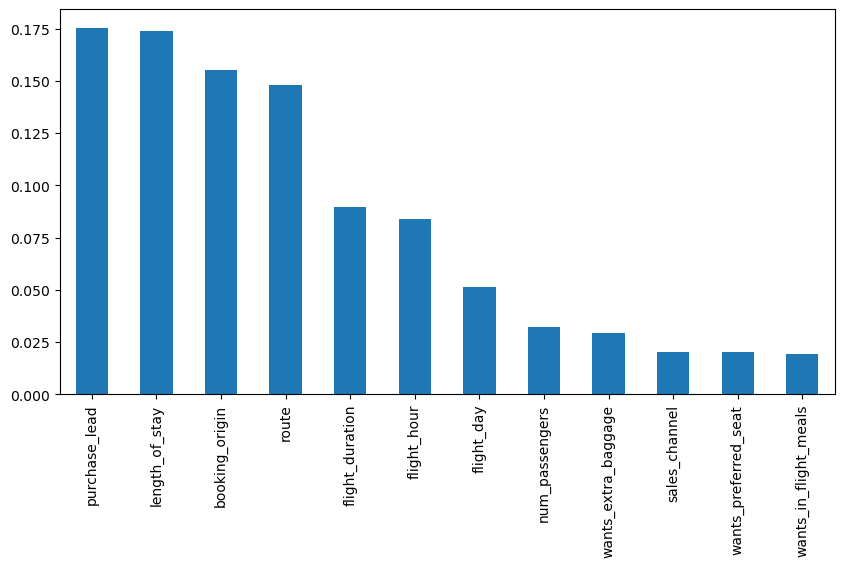

In [20]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot(kind='bar', figsize=(10, 5))
print(np.cumsum(feature_importances))